# FactShield: Quick Data Load & Explore

Load the dataset and do basic exploration to make sure everything works.


In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

print("✅ Imports loaded")


✅ Imports loaded


In [12]:
# Load the data
import os
from pathlib import Path

# SIMPLE SOLUTION: Just search for Fake.csv and use its location
# This works on ANY computer regardless of folder structure
print("Searching for data files...")

# Start from home directory and look for Fake.csv (max depth 5 to keep it fast)
found_data = None
for csv_file in Path.home().rglob('Fake.csv'):
    # Check if True.csv is in the same folder
    if (csv_file.parent / 'True.csv').exists():
        found_data = csv_file.parent
        break
    # Limit search to avoid being too slow
    if len(list(Path.home().rglob('Fake.csv'))) > 10:
        break

if not found_data:
    raise FileNotFoundError(
        "Could not find Fake.csv and True.csv files. "
        "Please make sure they are downloaded in the data/raw/ folder."
    )

print("Loading data...")
fake_df = pd.read_csv(found_data / 'Fake.csv')
true_df = pd.read_csv(found_data / 'True.csv')

# Add labels
fake_df['label'] = 1  # 1 = fake
true_df['label'] = 0  # 0 = real

# Combine
df = pd.concat([fake_df, true_df], ignore_index=True)

print(f"\n✅ Loaded {len(df):,} articles")
print(f"   Fake: {len(fake_df):,} ({len(fake_df)/len(df)*100:.1f}%)")
print(f"   Real: {len(true_df):,} ({len(true_df)/len(df)*100:.1f}%)")

df.head()


Searching for data files...
Loading data...

✅ Loaded 44,898 articles
   Fake: 23,481 (52.3%)
   Real: 21,417 (47.7%)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [13]:
# Quick exploration
print("Columns:", df.columns.tolist())
print("\nMissing values:", df.isnull().sum().sum())
print("\nDataset shape:", df.shape)
df.info()


Columns: ['title', 'text', 'subject', 'date', 'label']

Missing values: 0

Dataset shape: (44898, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


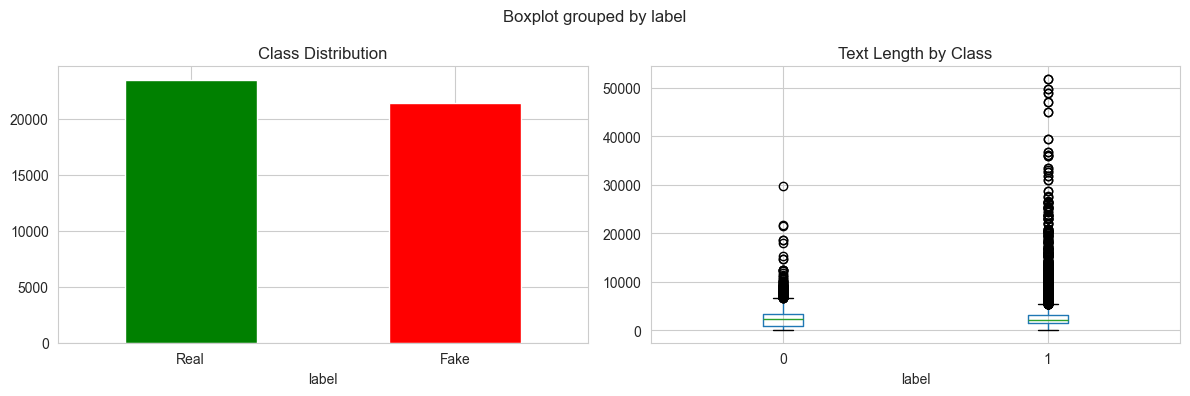

In [14]:
# Simple visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Class distribution
df['label'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution')
axes[0].set_xticklabels(['Real', 'Fake'], rotation=0)

# Text length
df['text_length'] = df['text'].str.len()
df.boxplot(column='text_length', by='label', ax=axes[1])
axes[1].set_title('Text Length by Class')

plt.tight_layout()
plt.show()


## ✅ Data loaded successfully!

Next steps:
1. Text preprocessing
2. Feature engineering  
3. Model training

Let's go! 🚀
